remember to install packages using pip before running
if you have only one python 3 version installed on your system then you can directly go for 
  - pip install scikit-learn
  - pip install seaborn
  - pip install pandas
  - pip install matplotlib
NB: numpy will be automatically installed with scikit-learn

if you have two python 3 versions installed on your system then first check in which python version you are running notebook
  - python3 --version

we got python3 version. now specify the version and run pip
  - python3.x -m pip install packagename

example if there is two python 3 versions in your system lets take 3.10 and 3.8 and you are running notebook in python 3.10 then easiest way to install packages is by
  - python3.10 -m pip install scikit-learn
  - python3.10 -m pip install seaborn
  - python3.10 -m pip install pandas
  - python3.10 -m pip install matplotlib 


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [16]:
boston = load_boston()
dp = pd.DataFrame(boston.data)

/home/lionex/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [22]:
dp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
dp.columns = boston.feature_names
dp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
dp['PRICE'] = boston.target

In [ ]:
dp.head()

In [24]:
dp.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [26]:
dp.shape


(506, 14)

In [27]:
dp.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [28]:
dp.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [30]:
dp.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [31]:
dp.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
dp.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [33]:
dp.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
dp.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot: >

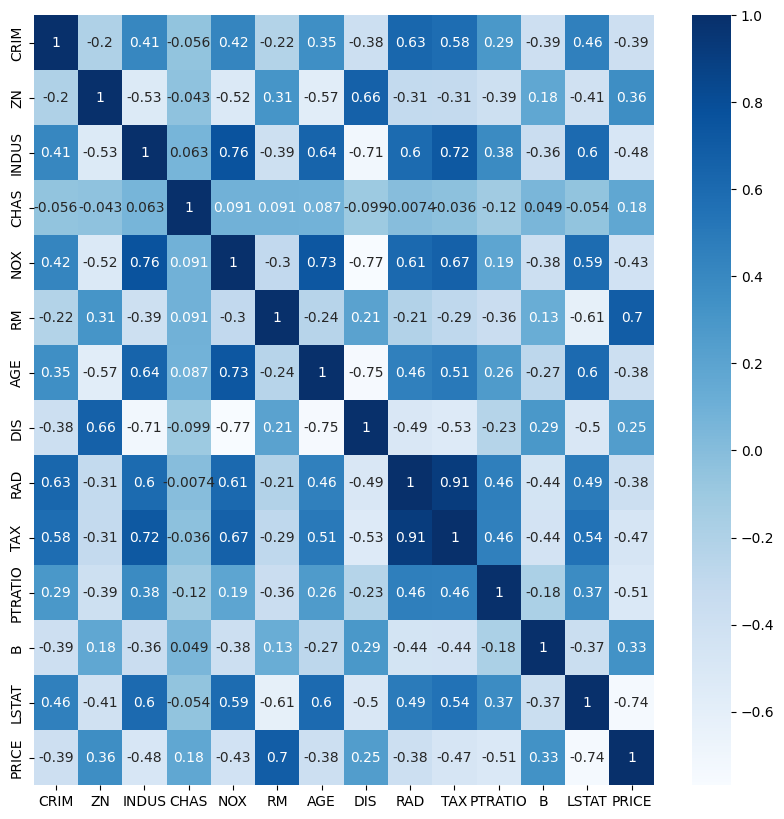

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dp.corr(), annot=True, cmap='Blues')

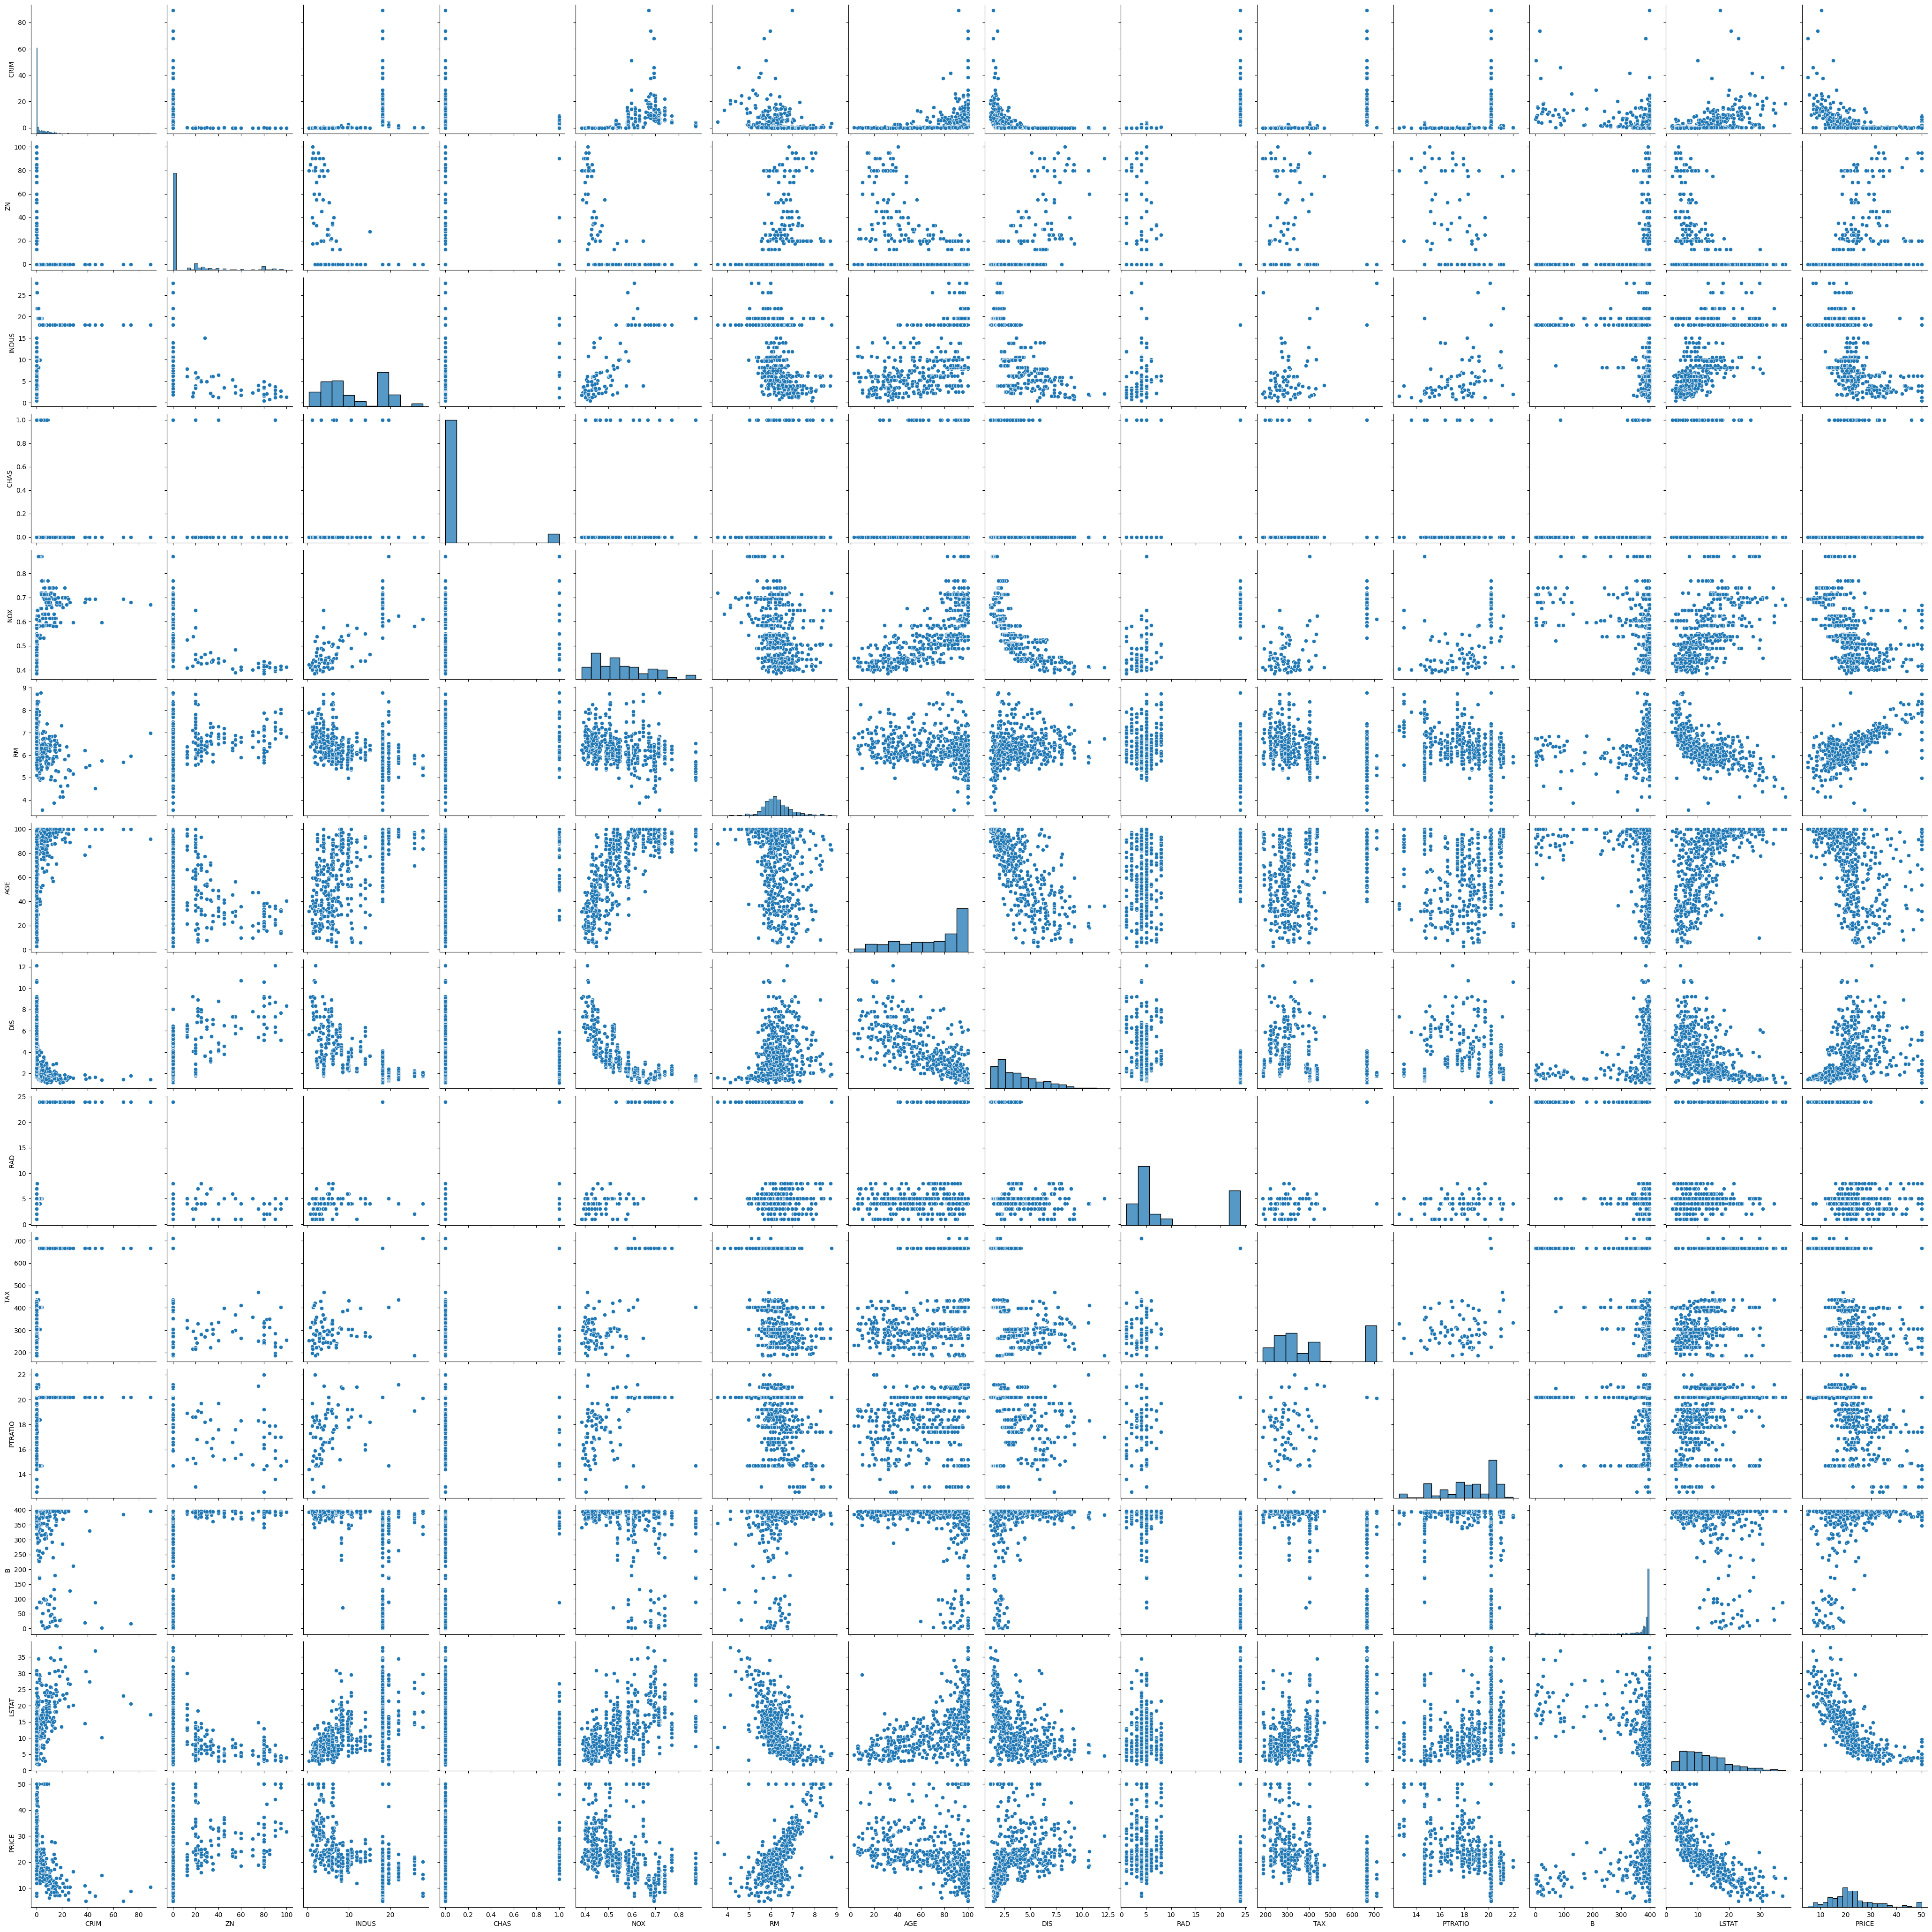

In [46]:
sns.pairplot(dp, height=3)

In the above cell height is used instead of size due to update. size can be used instead of height but a warning message will be print

In [51]:
dp.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [52]:
dp.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [53]:
dp.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
PRICE        9.197104
dtype: float64

In [56]:
dp.to_csv('boston.csv')

In [57]:
dp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [84]:
x = np.array(dp.drop('PRICE',axis=1))
y = np.array(dp.PRICE)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=21)

In [86]:
len(x_train)

354

In [87]:
len(x_test)

152

In [88]:
len(y_train)

354

In [66]:
len(y_test)

152

In [89]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [90]:
model.intercept_

41.275132095723315

In [91]:
model.coef_

array([-1.06409593e-01,  5.46097630e-02,  1.23596748e-02,  2.06935890e+00,
       -1.80468098e+01,  3.19000339e+00,  3.82971305e-03, -1.41542732e+00,
        3.51853896e-01, -1.36682480e-02, -1.05794513e+00,  1.17769987e-02,
       -5.24112368e-01])

In [92]:
y_test

array([14.1, 13.4, 22.1, 41.7, 28.5, 13.6, 23.1, 23. , 31.6, 16. , 18.9,
        8.5, 23.3,  7.2, 18.4, 25. , 13.4, 23.6, 14.4, 17.8, 18.7, 19.4,
       15.2, 17.9, 23.1, 39.8, 28.1, 37. , 20.6, 21.4, 24.2, 19.9, 32. ,
       13.9, 36.2, 32.9, 46.7, 21.7, 16.1, 14.9, 22.2, 41.3, 22.2, 50. ,
       22.2, 13.8, 24.1, 20.1, 30.5, 21.2, 34.9, 16.2, 50. , 13.8, 11.3,
        6.3,  7. , 21. , 19.3, 27.1, 13. , 33.4, 24.7, 20.9, 50. , 33.3,
       22. , 18.9, 21. , 20.4,  5.6, 23.8, 15. , 22. , 22.8, 20.5, 27.5,
       17.7, 22.7, 15.4, 19.3, 17.1, 23.7, 15.2, 10.4, 21.7, 36.5, 23.9,
       17.4, 24.8, 13.9,  8.7, 48.8,  8.3, 29.9, 18.2, 10.9, 19.1, 19.1,
       26.4, 17.6, 23.1, 13.4, 24.8, 35.4, 17.2, 20. , 18.3, 15.6, 23. ,
       22.9, 24.4, 30.8, 12.1, 16.6, 17.4, 14.6,  8.8, 14.5, 33.2, 11.9,
       26.2, 19.6, 20.9, 16.3, 17.3, 20.1, 27.9, 18.9, 50. , 23.3, 33.2,
       35.2, 12.7, 22.8, 22.6, 28.7, 18. , 16.7, 23.1, 22.5, 19.5,  7.2,
       50. , 44.8, 37.2, 19. , 46. , 16.6, 24.6, 14

In [102]:
y_pred = model.predict(x_test)
y_pred

array([14.89258974, 14.57903061, 26.81635463, 37.04435096, 33.71041847,
       12.71415418, 25.99616736, 29.27194311, 34.29084319, 19.22446389,
       24.00199036, 16.73594414, 28.81972955,  8.69765966, 18.86116568,
       27.98812974, 15.345912  , 29.22645092,  4.11294403, 17.85111736,
       20.7881856 , 26.79551081, 19.18709959,  1.96636678, 20.33353559,
       33.98377522, 25.01276413, 30.97685468, 17.30684065, 24.80652336,
       24.88096109, 18.89840553, 33.68584601, 13.37568499, 27.57361949,
       30.95700712, 34.63255018, 21.60124444, 20.76095853, 17.53151546,
       19.421609  , 32.90625084, 24.72386385, 24.97446216, 22.13208689,
       20.34198151, 30.38020637, 21.13442374, 30.69504891, 23.32470073,
       34.37418633, 14.86837491, 41.05513814, 16.95647423, 13.97056464,
       11.02514225,  7.68396509, 23.2978959 , 22.5498696 , 27.48871454,
       17.01765067, 35.38232901, 24.67889626, 22.87977105, 35.02855623,
       36.81096816, 29.4077295 , 19.75115691, 21.37124061, 19.48

In [95]:
model.score(x_test,y_test)

0.7115848967731224

In [96]:
er = mean_squared_error(y_test, y_pred)
er

27.579046610355338

In [97]:
mean_absolute_error(y_test, y_pred)

3.6141140709296153

In [98]:
np.sqrt(er)

5.251575631213488

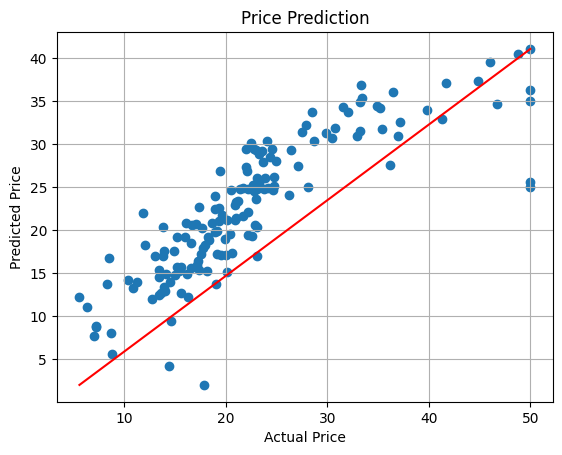

In [99]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Prediction')
plt.grid()
plt.plot([min(y_test), max(y_test)],[min(y_pred), max(y_pred)], color='Red')